### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 1: Naive Bayes Leaner for Adult Database


**Student Name(s):** Zhehong Mason Zhang, Beijia Rebecca Lai
<br>
**Student ID(s):** 1085462, 1133768



Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook.

## General info

<b>Due date</b>: Friday, 8 April 2022 7pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: This iPython notebook is a template which you will use for your Assignment 1 submission. You need to only submitted the completed copy of this iPython notebook.

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count). Submissions more than 5 days late will not be accepted (resul in a mark of 0).
<ul>
    <li>one day late, -1.0;</li>
    <li>two days late, -2.0;</li>
    <li>three days late, -3.0;</li>
    <li>four days late, -4.0;</li>
    <li>five days late, -5.0;</li>
</ul>

<b>Extensions</b>: Students who are demonstrably unable to submit a full solution in time due to medical reasons or other trauma, may apply for an extension.  In these cases, you should email <a href="mailto:ni.ding@unimelb.edu.au">Ni Ding</a> as soon as possible after those circumstances arise. If you attend a GP or other health care service as a result of illness, be sure to provide a Health Professional Report (HPR) form (get it from the Special Consideration section of the Student Portal), you will need this form to be filled out if your illness develops into something that later requires a Special Consideration application to be lodged. You should scan the HPR form and send it with the extension requests.

<b>Marks</b>: This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: Use Jupyter Notebook and Python page on Canvas for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  


<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. We reserve the right to deduct up to 2 marks for unreadable or exessively inefficient code.

8 of the marks available for this Project will be assigned to whether the four specified Python functions work in a manner consistent with the materials from COMP30027. Any other implementation will not be directly assessed (except insofar as it is required to make these five functions work correctly).

12 of the marks will be assigned to your responses to the questions, in terms of both accuracy and insightfulness. We will be looking for evidence that you have an implementation that allows you to explore the problem, but also that you have thought deeply about the data and the behaviour of the Naive Bayes classifier.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board (ED -> Assignments -> A1); we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>missing Authorship Declaration at the bottom of the page, -5.0
<LI>incomplete or unsigned Authorship Declaration at the bottom of the page, -3.0
</UL>
**NOTE: COMPLETE AND SUBMIT THIS FILE. YOU SHOULD IMPLEMENT FOUR FUNCTIONS AND INCLUDE YOUR ANSWERS TO THE QUESTIONS IN THIS FILE ONLY. NO OTHER SUBMISSION IS REQUIRED.**

**Keep your code clean. Adding proper comments to your code is MANDATORY.**

## Part 1: Base code [8 marks]

Instructions
1. Do **not** shuffle the data set
2. Treat the attributes as they are(e.g., do **not** convert numeric attributes to categorical or categorical to numeric). Implement a Naive Bayes classifier with appropriate likelihood function for each attribute.
3. You should implement the Naive Bayes classifier from scratch. Do **not** use existing implementations/learning algorithms.
4. You CANNOT have more than one train or predict function. Both continuous numeric attributes and categorical ones should be trained in one `train()` function, similarly for the `predict()`.  
5. Apart from the instructions in point 3, you may use libraries to help you with data reading, representation, maths or evaluation
6. Ensure that all and only required information is printed, as indicated in the final three code cells. Failure to adhere to print the required information will result in **[-1 mark]** per case. *(We don't mind details like you print a list or several numbers -- just make sure the information is displayed so that it's easily accessible)
7. You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find. 
8. You should add adequate comments to make your code easily comprehendible.*

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from typing import Tuple

# from pandas_profiling import ProfileReport

In [2]:
class Trainable:
    def __init__(self):
        self._is_fitted = False

    def fit(self, X, y=None):
        self._is_fitted = True
    
    def _check_is_fitted(self):
        if not self._is_fitted:
            raise ValueError("The model is not fitted")
        
        
class KernelDensityEstimator(Trainable):
    def __init__(self, bandwidth):
        """KDE for 1-D vectors

        Args:
            bandwidth (int): bandwitdh parameter for the kernel
        """
        super().__init__()
        self.bandwidth = bandwidth
    
    def fit(self, X: np.array):
        super().fit(X)
        self.x_is = X.reshape(-1)
        return self
    
    def score_samples(self, X: np.array) -> np.array:
        """Returns log likelihood of each element in X"""
        self._check_is_fitted()
        log_kde = np.vectorize(lambda x: np.log(norm.pdf(x - self.x_is, 0, self.bandwidth).mean()))
        return log_kde(X)
        

class DiscretePDF(Trainable):
    def  __init__(self, floor=1e-5, skip_val=None):
        super().__init__()
        self.floor = floor
        self.skip_val = skip_val
        self.log_probabilities = {}

    def fit(self, X: np.array):
        super().fit(X)
        values, counts = np.unique(X, return_counts=True)
        total = np.sum(counts)
        self.log_probabilities = {v: p for v, p in zip(values, np.log(counts/total))}
        if self.skip_val:
            self.log_probabilities[self.skip_val] = 0
        return self

    def score_samples(self, X: np.array) -> np.array:
        """Returns log likelihood of each element in X"""
        self._check_is_fitted()
        return np.array([
            self.log_probabilities[x] 
            if x in self.log_probabilities else np.log(self.floor)  # handle unseen cases
            for x in X.reshape(-1)])


class NormPDF(Trainable):
    def  __init__(self):
        super().__init__()
        self.mean = None
        self.std = None

    def fit(self, X: np.array):
        super().fit(X)
        self.mean, self.std = norm.fit(X)
        return self

    def score_samples(self, X: np.array) -> np.array:
        """Returns log likelihood of each element in X"""
        self._check_is_fitted()
        return norm.logpdf(X.reshape(-1), self.mean, self.std)


class NBClassifier(Trainable):
    def __init__(self, bandwidth=None, use_kde=False, skip_val=None):
        """Navie bayes classifier for both numerical and categorical variables.

        Args:
            bandwidth (int, optional): bandwidth of KDE kernal. Defaults to None.
            use_kde (bool, optional): whether classifier should use KDE over gaussain. Defaults to False.
            skip_val (str, optional): skip attributes with this value when predicting. Defaults to None.
        """
        super().__init__()
        self.bandwidth = bandwidth
        self.use_kde = use_kde
        self.skip_val = skip_val

        self.n_features = 0
        self.classes = []
        self.class_log_priors = None
        self.log_conditional_distros = {}
    
    def fit(self, X: pd.DataFrame, y):
        super().fit(X)
        self.n_features = X.shape[1]
        self.classes = np.unique(y).tolist()

        self.class_log_priors = DiscretePDF().fit(y)
        self._set_feature_log_proba(X, y)
        return self

    def _set_feature_log_proba(self, X: pd.DataFrame, y):
        if not self.class_log_priors:
            raise ValueError("No classes set")
        
        numeric_cols = X.select_dtypes(include=np.number).columns
        categorical_cols = X.select_dtypes(exclude=np.number).columns
        
        X['label'] = y
        for class_, subset in X.groupby('label'):
            # learn pdf of numeric features
            self.log_conditional_distros[class_] = {
                feature: KernelDensityEstimator(bandwidth=self.bandwidth).fit(subset[feature].to_numpy()) 
                if self.use_kde else NormPDF().fit(subset[feature].to_numpy()) 
                for feature in numeric_cols}
            
            # learn pdf of categorical features
            self.log_conditional_distros[class_].update({
                feature: DiscretePDF(skip_val=self.skip_val).fit(subset[feature].to_numpy()) 
                for feature in categorical_cols})
        del X['label']

    def predict(self, X: pd.DataFrame) -> Tuple[np.array, np.array]:
        """Returns predicted class and predicted log probability for each instance in X"""
        self._check_is_fitted()
        self._check_X(X)
        
        log_likelihoods = self._get_log_likelihoods(X)
        max_indices = np.argmax(log_likelihoods, axis=1)
        
        predictions = np.array([self.classes[i] for i in max_indices])
        pred_log_likelihoods = np.array([instance[i] for i, instance in zip(max_indices, log_likelihoods)])
        
        return predictions, pred_log_likelihoods

    def _check_X(self, X):
        if X.shape[1] != self.n_features:
            return ValueError("Incompatible shape for X")

    def _get_log_likelihoods(self, X: pd.DataFrame) -> np.array:
        log_likelihoods = []
        
        for class_ in self.classes:
            log_prior = self.class_log_priors.score_samples(np.array([class_]).reshape(-1, 1))[0]
            conditionals = np.stack([
                self.log_conditional_distros[class_][feature].score_samples(X[feature].to_numpy()) 
                for feature in X.columns]).T
            
            log_postior = log_prior + np.sum(conditionals, axis=1)
            log_likelihoods.append(log_postior)
            
        return np.array(log_likelihoods).T

In [3]:
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
# and implement 90-10 splitting as specified in the project description.
def preprocess(filepath):
    df = pd.read_csv(filepath)
    train_data, test_data = train_test_split(df, test_size=0.1, shuffle=False)
    return train_data, test_data

In [4]:
# This function should calculat prior probabilities and likelihoods (conditional probabilities) from the training data and using
# to build a naive Bayes model

def train(model, X, y):
    return model.fit(X, y)

In [5]:
# This function should predict classes for new items in the testing data

def predict(model, X):
    return model.predict(X)

In [6]:
# This function should evaluate the prediction performance by comparing your model’s class outputs to ground
# truth labels, return and output accuracy, confusion matrix and F1 score.

def evaluate(model, X, y, labels=None):
    y_pred, _ = model.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred, labels=labels).ravel()

    accuracy = (tp + tn) / (tp + fp + tn + fn)
    matrix = np.array([[tp, fn], [fp, tn]])
    f1 = tp / (tp + 0.5 * (fp + fn))

    return accuracy, f1, matrix

In [8]:
# This cell should act as your "main" function where you call the above functions 
# on the full ADULT data set, and print the evaluation results. [0.33 marks]



# First, read in the data and apply your NB model to the ADULT data
train_data, test_data = preprocess('dataset/adult.csv')
X_train, y_train = train_data.drop(columns=['label']), train_data['label']
X_test, y_test = test_data.drop(columns=['label']), test_data['label']

model = NBClassifier(bandwidth=2, use_kde=False)
model = train(model, X_train, y_train)
y_pred, y_pred_proba = predict(model, X_test)

# Second, print the full evaluation results from the evaluate() function
labels = [' >50K', ' <=50K']  # neg, pos
accuracy, f1, matrix = evaluate(model, X_test, y_test, labels)
print(f'accuracy: {accuracy}')
print(f'f1: {f1}')
print('confusion matrix (true\\pred): ')
print(matrix)

# Third, print data statistics and model predictions, as instructed below 
# N is the total number of instances, F the total number of attributes, L the total number of labels
# The "class probabilities" may be unnormalized
# The "predicted class ID" must be in range (0, L)
data = pd.concat([train_data, test_data], axis=0)

print("\nAttribute vectors of instances [0, 1, 2]: ")
print(data.iloc[:3, :-1].values) # of the first three records in adult.csv

print("\nNumber of instances (N): ", len(data))
print("Number of attributes (F): ", data.shape[1] - 1)
print("Number of labels (L): ", len(data['label'].unique()))

# print out the prediction results of the last three instances
print("\nPredicted class log-probabilities for instance N-3: ", y_pred_proba[-3])
print("Predicted class ID for instance N-3: ", y_pred[-3])
print("\nPredicted class log-probabilities for instance N-2: ", y_pred_proba[-2])
print("Predicted class ID for instance N-2: ", y_pred[-2])
print("\nPredicted class log-probabilities for instance N-1: ", y_pred_proba[-1])
print("Predicted class ID for instance N-1: ", y_pred[-1])


accuracy: 0.86
f1: 0.9078947368421053
confusion matrix (true\pred): 
[[69  8]
 [ 6 17]]

Attribute vectors of instances [0, 1, 2]: 
[[68 ' ?' ' 1st-4th' 2 ' Divorced' ' ?' ' Not-in-family' ' White'
  ' Female' 20 ' United-States']
 [39 ' State-gov' ' Bachelors' 13 ' Never-married' ' Adm-clerical'
  ' Not-in-family' ' White' ' Male' 40 ' United-States']
 [50 ' Self-emp-not-inc' ' Bachelors' 13 ' Married-civ-spouse'
  ' Exec-managerial' ' Husband' ' White' ' Male' 13 ' United-States']]

Number of instances (N):  1000
Number of attributes (F):  11
Number of labels (L):  2

Predicted class log-probabilities for instance N-3:  -19.55129938976589
Predicted class ID for instance N-3:   >50K

Predicted class log-probabilities for instance N-2:  -22.7424671097164
Predicted class ID for instance N-2:   >50K

Predicted class log-probabilities for instance N-1:  -16.71139284635581
Predicted class ID for instance N-1:   >50K


## Part 2: Conceptual questions [8 marks for groups of 1] / [16 marks for groups of 2]


If you are in a group of 1, you should respond to Q1 and Q2.

If you are in a group of 2, you should respond to Q1, Q2, Q3 and Q4.

A response to a question should take about 100–250 words. You may need to develope codes or functions to help respond to the question here. 

#### NOTE: We strongly recommend <u>including figures or tables, etc.</u> to support your responses. The figures and tables inserted in Markdown cells must be reproducable by your code.

### Q1 [4 marks]
<u>Sensitivity</u> and <u>specificity</u> are two model evaluation metrics.  A good model should have both sensitivity and specificity high. Use the $2 \times 2$ confusion matrix returned by `evaluate()` to calculate the sensitivity and specificity. Do you see a difference between them? If so, what causes this difference? Provide suggestions to improve the model performance. 

In [10]:
tp, fn, fp, tn = matrix.ravel()

sensitivity = tp / (tp + fn)  # recall
specificity = tn / (tn + fp)  # recall but for negatives
print(f'sensitivity: {sensitivity}\nspecificity: {specificity}')

positives = train_data[train_data['label'] == ' <=50K']
negatives = train_data[train_data['label'] == ' >50K']
print(f"positive instances: {len(positives)}\nnegative instances: {len(negatives)}")


sensitivity: 0.8961038961038961
specificity: 0.7391304347826086
positive instances: 692
negative instances: 208


Sensitivity is the proportion of true positives (in this case labeled <=50K) retrieved by the model, whereas specificity is the proportion of true negatives (labeled >50K) retrieved. In the present project, the sensitivity is higher than the specificity. This is inline with expectation since there are noticeably more positive instances in the training data for the model to learn from as can be seen from the results above. Some ways to improve the model’s performance include adding more negative instances to build a balanced dataset either by gathering more data or data augmentation (generating new data from existing data), implementing sample weight or class weight to compensate for imbalanced data, or through feature engineering (adding more insightful features from existing ones) and feature selection (removing highly correlated or unhelpful features).

### Q2 [4 marks]
You can adopt different methods for training and/or testing, which will produce different results in model evaluation. 

(a) Instead of Gaussian, <u>implement KDE</u> for  $P(X_i|c_j)$ for numeric attributes $X_i$. Compare the evaluation results with Gaussian. Which one do you think is more suitable to model $P(X_i|c_j)$, Gaussian or KDE? Observe all numeric attributes and justify your answer.

You can choose an arbitrary value for kernel bandwidth $\sigma$ for KDE, but a value between 3 and 15 is recommended. You should write code to implement KDE, not call an existing function/method such as `KernelDensity` from `scikit-learn`.

(b) Implement <u>10-fold and 2-fold cross-validations</u>.  
	Observe the evaluation results in each fold and the average accuracy, recall and specificity over all folds. 
	Comment on what is the effect by changing the values of $m$ in $m$-fold cross validation. (You can choose either Gaussian or KDE Naive Bayes.)

In [11]:
# (a) NBClassifier with KDE

train_data, test_data = preprocess('dataset/adult.csv')
X_train, y_train = train_data.drop(columns=['label']), train_data['label']
X_test, y_test = test_data.drop(columns=['label']), test_data['label']

model = NBClassifier(bandwidth=15, use_kde=True)
model = train(model, X_train, y_train)

labels = [' >50K', ' <=50K']  # neg, pos
accuracy, f1, matrix = evaluate(model, X_test, y_test, labels)
print(f'accuracy: {accuracy}')
print(f'f1: {f1}')
print('confusion matrix (true\\pred): ')
print(matrix)

accuracy: 0.83
f1: 0.8827586206896552
confusion matrix (true\pred): 
[[64 13]
 [ 4 19]]


In [95]:
# (b) M-fold Cross Validation

def cross_validate(model, data, cv):
    splits = np.array_split(data, cv)
    cv_results = []
    for i in range(cv):
        train_data, test_data = pd.concat(splits[:i] + splits[i+1:]), splits[i]
        X_train, y_train = train_data.drop(columns=['label']), train_data['label']
        X_test, y_test = test_data.drop(columns=['label']), test_data['label']

        model = train(model, X_train, y_train)

        accuracy, f1, matrix = evaluate(model, X_test, y_test, labels)

        tp, fn, fp, tn = matrix.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        cv_results.append((accuracy, sensitivity, specificity, f1))

    return np.mean(cv_results, axis=0), np.std(cv_results, axis=0)


2-fold cross validation
accuracy: 0.8180000000000001
sensitivity: 0.8531427141253027
specificity: 0.7027523623818809
f1: 0.8782100916247257
10-fold cross validation
accuracy: 0.813
sensitivity: 0.8435956066291709
specificity: 0.7127698935525022
f1: 0.8734038260107827


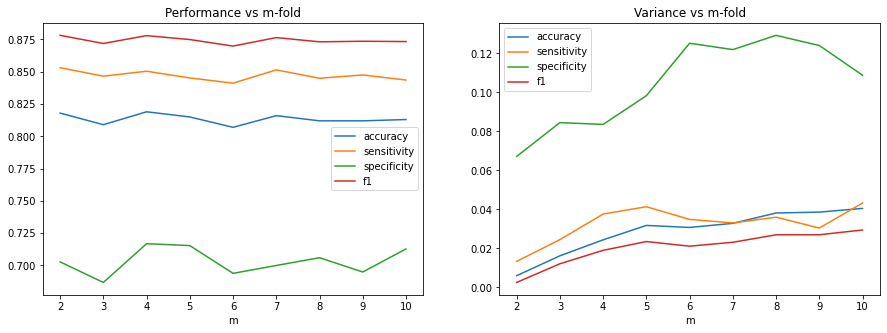

In [104]:
data = pd.read_csv("dataset/adult.csv")
model = NBClassifier(use_kde=False)

cvs = range(2, 11)
cv_results = [cross_validate(model, data, cv) for cv in cvs]
cv_metrics = np.array([i[0] for i in cv_results])
cv_variances = np.array([i[1] for i in cv_results])

print('2-fold cross validation')
accuracy, sensitivity, specificity, f1 = cv_metrics[0]
print(f'accuracy: {accuracy}\nsensitivity: {sensitivity}\nspecificity: {specificity}\nf1: {f1}')

print('10-fold cross validation')
accuracy, sensitivity, specificity, f1 = cv_metrics[-1]
print(f'accuracy: {accuracy}\nsensitivity: {sensitivity}\nspecificity: {specificity}\nf1: {f1}')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.set(xlabel='m', title='Performance vs m-fold')
ax1.plot(cvs, cv_metrics[:,0], label="accuracy")
ax1.plot(cvs, cv_metrics[:,1], label="sensitivity")
ax1.plot(cvs, cv_metrics[:,2], label="specificity")
ax1.plot(cvs, cv_metrics[:,3], label="f1")
ax1.legend()
ax2.set(xlabel='m', title='Variance vs m-fold')
ax2.plot(cvs, cv_variances[:,0], label="accuracy")
ax2.plot(cvs, cv_variances[:,1], label="sensitivity")
ax2.plot(cvs, cv_variances[:,2], label="specificity")
ax2.plot(cvs, cv_variances[:,3], label="f1")
ax2.legend()

(a) Kernel density estimation is a non-parametric way to estimate the probability density function so we expect it to provide a more accurate and robust estimate of the numerical features. However, all the numerical features in the present project are unimodal except for education num, and display a bell-like distribution (see profile report), meaning they can already be adequately modeled with gaussian distribution. In addition, the choice of bandwidth is important for KDE’s performance (for the present report, bandwidth between 3-15 resulted in accuracy between 0.81-0.86), which can be difficult to choose correctly. Therefore, it appears that gaussian distribution is more suited for the model.

(b) From the results above, we observe that as the value of m increases, the average accuracy of the m-fold cross validation slightly decreases. Since more folds means a larger training dataset and a smaller testing dataset in each iteration, we expect the the average accuracy to be less biased and closer to the true accuracy which could mean an increase or decrease depending on the dataset and the model applied. Since more folds means more iterations, we also expect the function to take longer to execute.

### Q3 [4 marks]
In `train()`, you are asked to treat the missing value of nominal attributes as a new category. There is another option (as suggested in Thu lecture in week 2): <u>ignoring the missing values</u>. 
Compare the two methods in both large and small datasets. Comment and explain your observations.
You can extract the first 50 records to construct a small dataset.Use Gaussian Naive Bayes only for this question.

small dataset with 50 instances
model1 accuracy: 0.4
model2 accuracy: 0.4

large dataset with 1000 instances
model1 accuracy: 0.86
model2 accuracy: 0.86



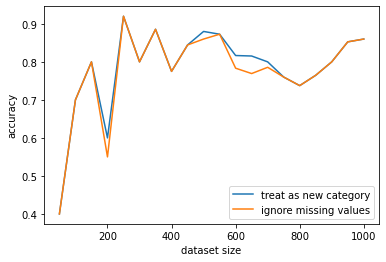

In [14]:
# compare model1 = treat as new category and model2 = ignore missing values

data = pd.read_csv("dataset/adult.csv")
# data = data.sample(frac=1)
model1 = NBClassifier(bandwidth=2, use_kde=False)
model2 = NBClassifier(bandwidth=2, use_kde=False, skip_val=' ?')
sizes = range(50, 1001, 50)

results = []
for size in sizes:
    train_data, test_data = train_test_split(data.iloc[:size, :], test_size=0.1, shuffle=False)
    X_train, y_train = train_data.drop(columns=['label']), train_data['label']
    X_test, y_test = test_data.drop(columns=['label']), test_data['label']

    model = train(model1, X_train, y_train)
    accuracy1, f1, matrix = evaluate(model, X_test, y_test, labels)
    model = train(model2, X_train, y_train)
    accuracy2, f1, matrix = evaluate(model, X_test, y_test, labels)
    results.append((accuracy1, accuracy2))

print("small dataset with 50 instances")
accuracy1, accuracy2 = results[0]
print(f'model1 accuracy: {accuracy1}\nmodel2 accuracy: {accuracy2}\n')
print("large dataset with 1000 instances")
accuracy1, accuracy2 = results[-1]
print(f'model1 accuracy: {accuracy1}\nmodel2 accuracy: {accuracy2}\n')

results = np.array(results)
plt.xlabel("dataset size")
plt.ylabel("accuracy")
plt.plot(sizes, results[:, 0], label="treat as new category")
plt.plot(sizes, results[:, 1], label="ignore missing values")
plt.legend()
plt.show()

We observe that the accuracy of the model where missing values in nominal variables are treated as a new category consistently match or outperform that of the model where missing values are ignored. The observation agrees with our hypothesis that the first method captures extra information about the presence of missing values, which the model can use to make better predictions since the data may be missing not at random. 

### Q4 [4 marks]
In week 4, we have learned how to obtain information gain (IG) and gain ratio (GR) to choose an attribute to split a node in a decision tree. We will see how to apply them in the Naive Bayes classification.

(a) Compute the GR of each attribute $X_i$, relative to the class Trainable. In the Na\"ive Bayes classifier, remove attributes in the ascending order of GR: first, remove $P(X_i|c_j)$ such that $X_i$ has the least GR; second, remove $P(X_{i'}|c_j)$ such that $X_{i'}$ has the second least GR,......, until there is only one $X_{i*}$ with the largest GR remaining in the maximand $P(c_j) P(X_{i^*} | c_j)$. Observe the <u>change of the accuracy for both Gaussian and KDE</u> (Choose bandwidth $\sigma=10$ for KDE).

(b) Compute the IG between each pair of attributes. Describe and explain your observations. Choose an attribute and implement an estimator to predict the value of `education num`. Explain why you choose this attribute. Enumerate two other examples that an attribute can be used to estimate the other and explain the reason.  

In [15]:
def info_gain_gain_ratio(data, feature1, feature2):    
    # entropy before splitting
    probs_before = data[feature2].value_counts(normalize=True)
    entropy_before = - np.sum(probs_before * np.log2(probs_before))

    mean_info = split_info = 0
    for _, data_after in data.groupby(feature1):
        # entropy after splitting
        weight = len(data_after) / len(data)
        probs_after = data_after[feature2].value_counts(normalize=True)
        entropy_after = - np.sum(probs_after * np.log2(probs_after))
        mean_info += weight * entropy_after
        split_info += - weight * np.log2(weight)

    info_gain = entropy_before - mean_info
    gain_ratio = info_gain / split_info
    return info_gain, gain_ratio


### (a)

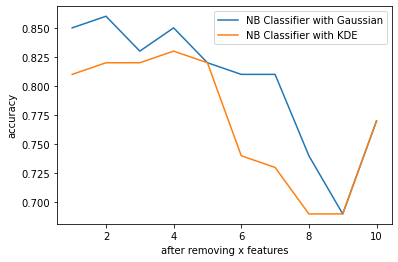

In [16]:
data = pd.read_csv("dataset/adult.csv")
features = data.columns[:-1]

# sort features by their gain ratio
features_sorted = []
for feature in features:
    ig, gain_ratio = info_gain_gain_ratio(data, feature, 'label')
    features_sorted.append((gain_ratio, feature))
features_sorted.sort()

# for gain_ratio, feature in results:
#     print(f'Gain Ratio({feature}) = {gain_ratio}')

# remove features and evaluate model performance
results = []
remain_data = data.copy()
for _, feature in features_sorted[:-1]:
    del remain_data[feature]

    train_data, test_data = train_test_split(remain_data, test_size=0.1, shuffle=False)
    X_train, y_train = train_data.drop(columns=['label']), train_data['label']
    X_test, y_test = test_data.drop(columns=['label']), test_data['label']

    model1 = NBClassifier(bandwidth=2, use_kde=False)
    model = train(model1, X_train, y_train)
    accuracy1, f1, matrix = evaluate(model, X_test, y_test, labels)
    model2 = NBClassifier(bandwidth=10, use_kde=True)   
    model = train(model2, X_train, y_train)
    accuracy2, f1, matrix = evaluate(model, X_test, y_test, labels)
    results.append((accuracy1, accuracy2))

results = np.array(results)
plt.xlabel("after removing x features")
plt.ylabel("accuracy")
plt.plot(range(1,len(features)), results[:, 0], label='NB Classifier with Gaussian')
plt.plot(range(1,len(features)), results[:, 1], label='NB Classifier with KDE')
plt.legend()
plt.show()

From the graph above, we observe that as the number of features removed increases, the performance of the NB Classifier with Gaussian steadily decreases, on the other hand, the performance of the NB Classifier with KDE also steadily decreases but sharply increases when there is only one remaining feature. Therefore, We can conclude that the NB Classifier with KDE with bandwidth=10 is the better estimator when there is only one feature.

### (b)

In [39]:
data = pd.read_csv("dataset/adult.csv")
features = list(data.columns[:-1])

# info gain between each pair of features
pairs_sorted = []
for feature1 in features:
    for feature2 in features:
        info_gain, gr = info_gain_gain_ratio(data, feature1, feature2)
        pairs_sorted.append((info_gain, feature1, feature2))
pairs_sorted.sort()

# for info_gain, features1, features2 in pairs_sorted:
#     print(f'Info Gain({features1}, {features2}) = {info_gain}')

# select feature by their info gain with education num
features.remove('education num')

features_sorted = []
for feature in features:
    info_gain, gr = info_gain_gain_ratio(data, feature, 'education num')
    features_sorted.append((info_gain, feature))
features_sorted.sort(reverse=True)

# for info_gain, feature in features_sorted:
#     print(f'Info Gain({feature}) = {info_gain}')

# implement estimator to predict education num
# feature used = education for model1, age for model2, occupation for model3
y_preds = []
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)
for _, feature in features_sorted[:3]:
    model = NBClassifier(bandwidth=10, use_kde=True)
    X_train, y_train = train_data[feature].to_frame(), train_data['education num']
    X_test, y_test = test_data[feature].to_frame(), test_data['education num']

    model = NBClassifier(bandwidth=2, use_kde=False)
    model = train(model, X_train, y_train)
    y_preds.append(predict(model, X_test))


C:\Users\rebec\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1911: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\rebec\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


From the information gain between each pair of attributes, we observe that the information gain is symmetric such that the information gain for splitting feature1 on feature2 is equal to the information gain for splitting feature2 on feature1. We also observe that the information gain is biased towards highly branching attributes. To reduce this bias, we normalise the information gain by the split information to get the gain ratio then choose the feature with the highest gain ratio to predict education num. The two other features are = ... From part (a), the NB Classifier with Gaussian and the NB Classifier with KDE are both reasonable choice for the one feature estimator.

<b>Authorship Declaration</b>:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>:  Zhehong Mason Zhang 1085462, Beijia Rebecca Lai 1133768
   
   <b>Dated</b>: 08/04/2022